In [1]:
import pandas as pd
raw_df = pd.read_csv('/Users/urielf/PycharmProjects/sentimental_analysis_for_tweets/sentiment_tweets3.csv')

import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
raw_df = pd.read_csv('/Users/urielf/PycharmProjects/sentimental_analysis_for_tweets/sentiment_tweets3.csv')

names_dict = {'message to examine':'tweet','label (depression result)': 'label'}
tweets_df = raw_df.rename(names_dict,axis=1)
tweets_df = tweets_df[names_dict.values()]
print(raw_df.head())
print(raw_df.columns)


   Index                                 message to examine  \
0    106  just had a real good moment. i missssssssss hi...   
1    217         is reading manga  http://plurk.com/p/mzp1e   
2    220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3    288  @lapcat Need to send 'em to my accountant tomo...   
4    540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   

   label (depression result)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')


In [2]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2, clean=True):
    if clean:
        # specific
        message = re.sub(r"won't", "will not", message)
        message = re.sub(r"can\'t", "can not", message)
        message = re.sub(r"twitter", " ", message)

        # remove any url
        message = re.sub(r"http[s]?://\S+", " ", message)
        message = re.sub(r"quot", " ", message)
        message = re.sub(r"amp", " ", message)
        # general
        message = re.sub(r"n\'t", " not", message)
        message = re.sub(r"\'re", " are", message)
        message = re.sub(r"\'s", " is", message)
        message = re.sub(r"\'d", " would", message)
        message = re.sub(r"\'ll", " will", message)
        message = re.sub(r"\'t", " not", message)
        message = re.sub(r"\'ve", " have", message)
        message = re.sub(r"\'m", " am", message)

        # special char
        message = re.sub(r'[^A-Za-z0-9]+', " ", message)

        # message = re.sub(r"@+"," ", message)

        # remove any thing with html tags
        # message = cleanhtml(message)
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if clean:
        words = [re.sub(r'https?://\S+', '', word) for word in words]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    return words

def get_clean_tweet(df):
    result = dict()
    for (i, message) in enumerate(df['tweet']):
        processed_message = process_message(message,gram=1)
        result[i] = " ".join(processed_message)
    df['clean_tweet'] = result.values()
    return df



clean_tweets_df = get_clean_tweet(tweets_df)
print(clean_tweets_df.head())

                                               tweet  label  \
0  just had a real good moment. i missssssssss hi...      0   
1         is reading manga  http://plurk.com/p/mzp1e      0   
2  @comeagainjen http://twitpic.com/2y2lx - http:...      0   
3  @lapcat Need to send 'em to my accountant tomo...      0   
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0   

                                         clean_tweet  
0                 real good moment missssssssss much  
1                                         read manga  
2                                       comeagainjen  
3  lapcat need send account tomorrow oddli even r...  
4                    add myspac myspac com lookthund  


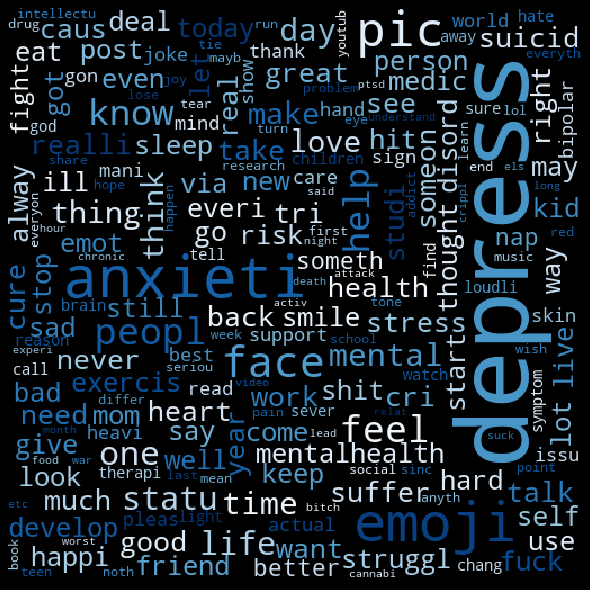

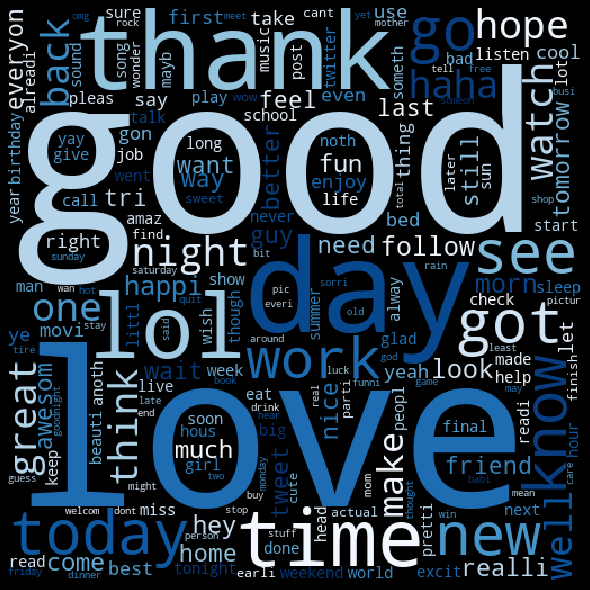

In [3]:
depressive_words = ' '.join(list(clean_tweets_df[clean_tweets_df['label'] == 1]['clean_tweet']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

positive_words = ' '.join(list(clean_tweets_df[clean_tweets_df['label'] == 0]['clean_tweet']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'),
plt.tight_layout(pad = 0)
plt.show()
